<a href="https://colab.research.google.com/github/luisbisaro/pandas.datasets/blob/main/RESOLUCION_TP4_Luis_Bisaro_CienciaDeDatos_PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabajo Practico Nº 4**
Analisis sobre data set ✅

1= Buscar los siguientes data set en la web
* Titanic
* Iris
* Wine
* Indian Diabetes

2- Explicar de cada data set , sus diferentes Variables ✅

3- Decide justificando tu respuesta que tipo de categoria de variable son ✅

4- Detectar y arreglar los siguientes conceptos ✅

* Valores Ausente ✅
* Valores Atipicos ✅

5- De los difentes data set , se puede eliminar alguna columna ✅

6- Realizar analisis univariados ✅

* Grafico de frecuencia
* Grafico de torta
* Histograma
* etc

7- En base a los graficos del punto 6 realizar distintas concluciones

8- Realizar analisis de corelacion y explicar que variable estan correlacionadas ✅

9-Realizar un analisis de grafico de cherrnoff ⛔ detectar outlires ✅

PD Pueden Buscar data set de kaggle

# Funciones generales - datos atipicos - datos faltantes

In [ ]:
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import seaborn as sns

#https://raw.githubusercontent.com/luisbisaro/pandas.datasets/main/diabetes.csv
#https://raw.githubusercontent.com/luisbisaro/pandas.datasets/main/titanic.csv
#https://raw.githubusercontent.com/luisbisaro/pandas.datasets/main/Iris.csv
#https://raw.githubusercontent.com/luisbisaro/pandas.datasets/main/wine.csv

#cargar el data set en un dataframe
diabetes_df= pd.read_csv('https://raw.githubusercontent.com/luisbisaro/pandas.datasets/main/diabetes.csv')
iris_df= pd.read_csv('https://raw.githubusercontent.com/luisbisaro/pandas.datasets/main/Iris.csv')
wine_df= pd.read_csv('https://raw.githubusercontent.com/luisbisaro/pandas.datasets/main/wine.csv')
titanic_df= pd.read_csv('https://raw.githubusercontent.com/luisbisaro/pandas.datasets/main/titanic.csv')

#titanic_df= pd.read_csv('https://raw.githubusercontent.com/luisbisaro/pandas.datasets/main/titanic.csv',usecols=['Survived','Age','Sex','Pclass','Embarked'])

valoresAtipicos=[]
#-----------------------------------------------------------------------------------------------------------------------
#--------------DESCRIPCION DE LOS DATASET ------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------
datasets=[iris_df,diabetes_df,wine_df,titanic_df]
datasets_n=['iris','diabetes','wine','titanic']
#for i in range (len(datasets)):
#  print(f"el dataset {datasets_n[i]} tiene {datasets[i].shape[0]} filas y {datasets[i].shape[1]} columnas ")
  #print(f"el dataset {datasets_n[i]} tiene  {datasets[i].describe()} ") #hacer por dataset y con nombre de columnas
#
#-----------------------------------------------------------------------------------------------------------------------

#-----------------------------------------------------------------------------------------------------------------------
#--------------------       FUNCION PARA mostrar lo valores atipicos   OK   ----------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------
def valores_atipicos(indice,descripcion1,set_a_usar1,valor_columna1):
  valoresAtipicos.clear()
  REF1= (descripcion1.iat[4,indice]) - (1.5*((descripcion1.iat[6,indice] - descripcion1.iat[4,indice])))
  REF3= (descripcion1.iat[6,indice]) + (1.5*((descripcion1.iat[6,indice] - descripcion1.iat[4,indice])))
  ver_valores=(set_a_usar1[valor_columna1[indice]])
#------------ mostrar los valores atipicos ----------------------------------------------------------
  for k in range(len(ver_valores)):
    if (ver_valores[k]<REF1) or (ver_valores[k]>REF3):
      valoresAtipicos.append(ver_valores[k])
  return (valoresAtipicos)

#-----------------------------------------------------------------------------------------------------------------------
#------------------FUNCION PARA DETECTAR OUTLIERS con ciclo for para ver todas las columnas -OK-------------------------
#-----------------------------------------------------------------------------------------------------------------------
#uso de la funcion
#valores=XXXX_df.describe()        #Generate descriptive statistics.
#columns = XXXX_df.columns.values  #return the column labels of the DataFrame.
#set_a_usar=XXXX_df
#outliers(valores,columns,set_a_usar)

def outliers(descripcion,columnas,set_a_usar):

  for i in range (len(columnas)-1):  # cambio la longitud disminuyendo en uno

    valor_columna=columns[0:].tolist()
    if (type(set_a_usar.iat[0,i])==str):
      # testeo si los valores son numeros o categorias //fila 0 ///columnas i
      #si son categorias, muestro el mensaje
      valores_unicos=np.array(np.unique(set_a_usar[valor_columna[i]], return_counts=True))
      #y busco los valores unicos que tiene la columna
      #transformo en array para poder tomar la cantidad de columnas, sino tomo solamente la cantidad de filas
      #el array que da np.unique es 2 filas y las columnas son la cantidad de categorias distintas
      print("la columna \033[92m",valor_columna[i],"\033[0m, contiene\033[93m", len(valores_unicos[0]),"\033[0mdatos del tipo categorico, sus valores son:")
      for j in range(len(valores_unicos[0][:])):
        #imprimo los valores
        print("  --> \033[93m",valores_unicos[0][j], "\033[0m con una frecuencia absoluta de\033[96m",valores_unicos[1][j],"\033[0m")
      print("")
    else:
      valores_atipicos(i,descripcion,set_a_usar,valor_columna)
      #uso la funcion para calcular los valores atipicos
      if (len(valoresAtipicos)>0):
        #si hay muestro la cantidad y sus valores, si no hay solo mensaje
        print (f"En la columna\033[1m  {valor_columna[i]} \033[0m hay \033[1m \033[92m",len(valoresAtipicos),'\033[0m',"valores atipicos y son:"'\033[92m''\033[1m',sorted(valoresAtipicos),'\033[0m') #negrita y color
      else:
        print(f"En la columna \033[1m {valor_columna[i]} \033[0m no hay valores atipicos")

#-----------------------------------------------------------------------------------------------------------------------


#Dataset IRIS


### **Introducción**
---
 El dataset Iris es un conjunto de datos de clasificación multiclase clásico y muy sencillo. Introducido por el estadístico y biólogo británico Ronald Fisher en su artículo de 1936 "The use of multiple measurements in taxonomic problems". El conjunto de datos de Iris contiene cuatro características (longitud y anchura de sépalos y pétalos) de 150 muestras de tres especies de flores Iris (Iris setosa, Iris virginica e Iris versicolor) El objetivo es construir un modelo que utilice las características para clasificar las flores con un máximo de precisión.


### **Variables**
---
```
print(f"el dataset {datasets_n[0]} tiene {datasets[0].shape[0]} filas y {datasets[0].shape[1]} columnas ")
 el dataset iris tiene 150 filas y 5 columnas
```
Vemos que el data set posee 150 filas y 5 columnas. Las columnas representan las variables medidas, las cuales son caracteristicas de las flores de la planta IRIS.
Ellas son la longitud y el ancho del petalo y del sepalo.
```
sepal_length    float64  largo del sepalo
sepal_width     float64  ancho del sepalo
petal_length    float64  largo del petalo
petal_width     float64  ancho del petalo
species          object  tipo de especie
```
Vemos que las variables medidas en el ancho y largo son del tipo cuantitativo continuo.
La caracteristica de la especie, es del tipo cuantitativo.


Valores nulos
---
Vemos que el dataset no posee valores nulos ni faltantes. Esto lo evaluamos con la funcion:
```
iris_df.isnull().sum()
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
```
###Valores atipicos - cualitativos
---
Para encontrar estos valores, hice la funcion OUTLIERS, la cual me da como resultado, si en las columnas numericas, hay valores atipicos y en las que son del tipo cualitativo, como en este caso "species", me devuelve los valores unicos y su frecuencia.
Como dato de entrada utilizamos la funcion df.describe() cuya salida es:
```
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
```
a partir de ella y con los calculos clasicos de estadisticas obtenemos los atipicos.
Lo siguiente es lo que nos da como resultado la funcion para el dataset IRIS:

```
En la columna  sepal_length  no hay valores atipicos
En la columna  sepal_width  hay   4  valores atipicos y son: [2.0, 4.1, 4.2, 4.4]
En la columna  petal_length  no hay valores atipicos
En la columna  petal_width  no hay valores atipicos
la columna  species , contiene 3 datos del tipo categorico, sus valores son:
  -->  Iris-setosa  con una frecuencia absoluta de 50
  -->  Iris-versicolor  con una frecuencia absoluta de 50
  -->  Iris-virginica  con una frecuencia absoluta de 50
```
Donde vemos que tenemos datos apartados en la columna sepal_width y en la columna species, tres tipos de especies con una frecuencia absoluta de 50 para cada una de ellas.
###Analisis de los graficos
---
Se realizan graficos de caja y bigotes para los datos de las columnas numericas, y se comprueba en ellos que los datos apartados estan en las mismas columnas y con la cantidad correcta.

Se procede a analizar las variables combinadas, mediante un grafico de dispersion.

La longitud de los pétalos y la anchura de los pétalos son características muy útiles que indican claramente muchas cosas.

* Tienden a una relación positiva, lo que significa que si uno aumenta, el otro valor
también aumenta.
* Las dimensiones de los pétalos son evidentemente más pequeños para setosa, tanto en ancho como en longitud.
* La especie setosa esta claramente agrupada
* Las flores versicolor son más pequeñas que las flores verginica, aunque en este caso la línea divisoria entre estas especies es un poco más imprecisa.

Al graficar la longitud vs el ancho de sépalo se puede observar lo siguiente:

* La especie setosa tiende a tener un ancho mayor y una longitud inferior que las demás.
* Muchas flores versicolor también tienen una longitud pequeña en su sepalo. Mientras que  las flores virginica tienden a ser mayores.
* Las flores setosa tienen una variabilidad mayor en el ancho que las demás especies.


Por ultimo se realiza un grafico de torta, para ver las proporciones de las especies.













el dataset iris tiene 150 filas y 5 columnas 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

En la columna  sepal_length  no hay valores atipicos
En la columna  sepal_width  hay   4  valores atipicos y son: [2.0, 4.1, 4.2, 4.4] 
En la columna  petal_length  no hay valores atipicos
En la columna  petal_width  no hay valores atipicos



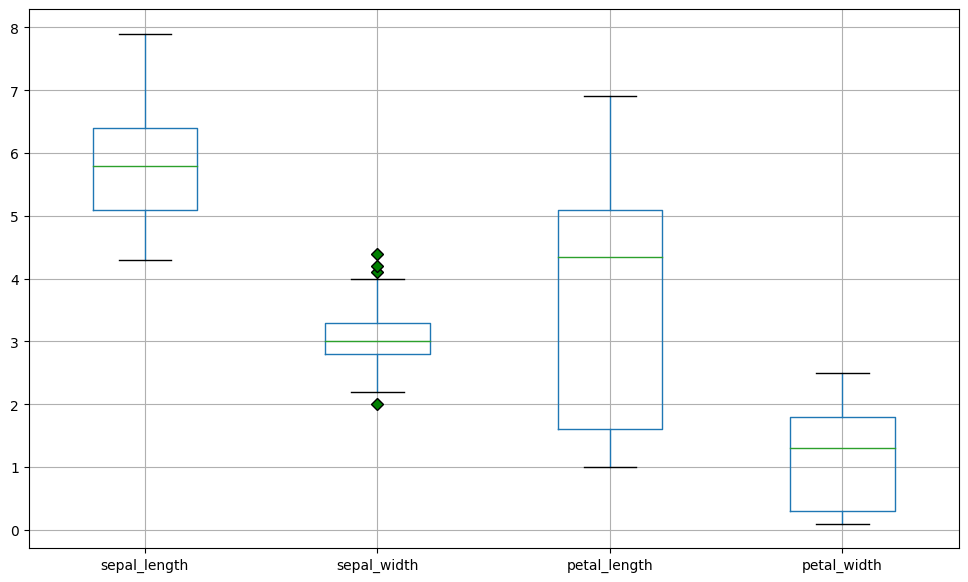

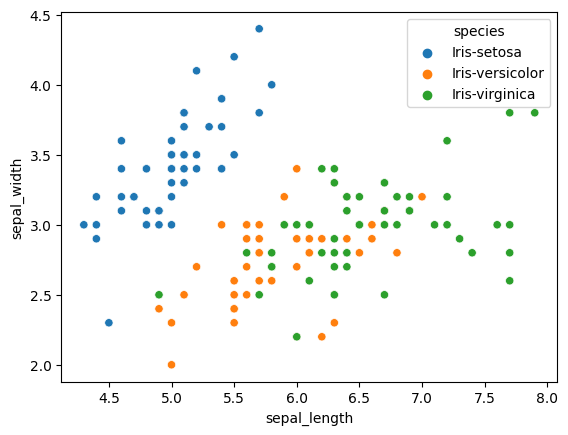

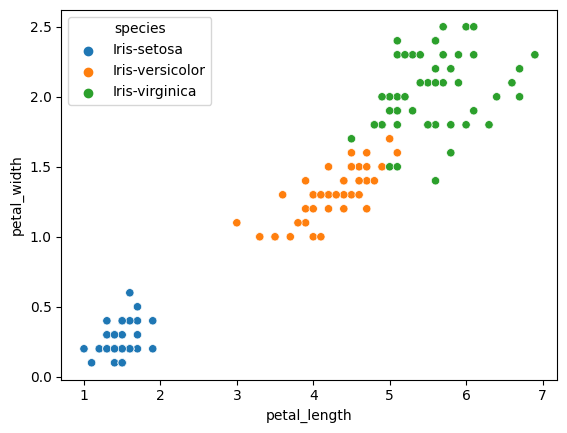

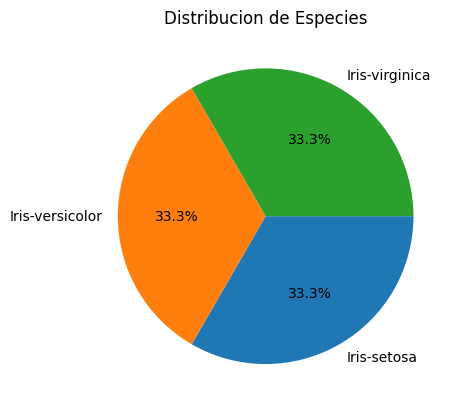

In [ ]:

valoresAtipicos=[]
datasets=[iris_df,diabetes_df,wine_df,titanic_df]
datasets_n=['iris','diabetes','wine','titanic']

print()
print(f"el dataset {datasets_n[0]} tiene {datasets[0].shape[0]} filas y {datasets[0].shape[1]} columnas ")
#print(datasets[0].describe())
#print(iris_df.head(5))
print()
#iris_df.info()    #informacion de las variables

print(iris_df.isnull().sum())
print()
print(iris_df.dtypes)
print()
#Ok probado
valores=iris_df.describe()

columns = iris_df.columns.values[:]  # mando un valor menos que es el dato categorico   cambio 25/08
set_a_usar=iris_df
outliers(valores,columns,set_a_usar)
print()
#-*************************************************************************

graficar=columns[0:-1].tolist()  #agrego una dimension por lo que no mande antes la columna del categorico
# transformo el df en lista
plt.figure(figsize=(12, 7))
green_diamond = dict(markerfacecolor='g', marker='D')
#tipo de marcador para los datos apartados
#iris_df.boxplot(column='sepal_width', flierprops=green_diamond) # para graficar solo una columna
iris_df.boxplot(column=graficar, flierprops=green_diamond)
plt.show()
print()
#-*************************************************************************
fig, ax = plt.subplots()
sns.scatterplot(data=iris_df, x=iris_df['sepal_length'], y=iris_df['sepal_width'], ax=ax, hue="species")

fig, ax = plt.subplots()
sns.scatterplot(data=iris_df, x=iris_df['petal_length'], y=iris_df['petal_width'], ax=ax, hue="species")

plt.show()
print()
#-************************************************************************
# Datos
fig, ax = plt.subplots()
valores=np.array(np.unique(iris_df['species'], return_counts=True))
grupos = valores[0][:]
valor = valores[1][:]
# Pie chart
plt.title('Distribucion de Especies')
ax.pie(valor, labels = grupos, counterclock = False, autopct = '%1.1f%%')
plt.show()



#-************************************************************************




# Dataset WINE



### **Introducción**
---
 El dataset Wine es un conjunto de datos de clasificación multiclase .Este conjunto de datos es el resultado de un análisis químico de vinos cultivados en la misma región de Italia pero derivados de tres cultivares diferentes. El análisis determinó las cantidades de 13 constituyentes que se encuentran en cada uno de los tres tipos de vinos”


### **Variables**
---
```
print(f"el dataset {datasets_n[2]} tiene {datasets[2].shape[0]} filas y {datasets[2].shape[1]} columnas ")
el dataset wine tiene 178 filas y 14 columnas
```
Vemos que el data set posee 178 filas y 14 columnas. Las columnas representan las variables medidas, las cuales son caracteristicas de analisis fisico - quimicos a distintos vinos.
```
print(wine_df.dtypes)
Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object
```
Vemos que las variables medidas son todas del tipo cuantitativo,algunas del tipo entero, tal como la clasificacion del tipo de vino o el contenido de Mg. La mayoria son del tipo float, dado que se miden con decimales.


Valores nulos
---
Vemos que el dataset no posee valores nulos ni faltantes. Esto lo evaluamos con la funcion:
```
print(wine_df.isnull().sum())
Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64
```
###Valores atipicos - cualitativos
---
Para encontrar estos valores, hice la funcion OUTLIERS, la cual me da como resultado, si en las columnas numericas, hay valores atipicos y en las que son del tipo cualitativo, en este caso todas las variables son cuantitativas, no hay del tipo cualitativa.

La columna Wine, si bien es numerica, representa un tipo de variable categorica, donde el numero representa una clase especifica de vino. La siguiente es la nomenclatura que se utiliza:

* Class 1 - 59
* Class 2 - 71
* Class 3 - 48

A partir de ella y con los calculos clasicos de estadisticas obtenemos los atipicos.
Lo siguiente es lo que nos da como resultado la funcion para el dataset WINE:

```
En la columna  Wine  no hay valores atipicos
En la columna  Alcohol  no hay valores atipicos
En la columna  Malic.acid  hay   3  valores atipicos y son: [5.51, 5.65, 5.8]
En la columna  Ash  hay   3  valores atipicos y son: [1.36, 3.22, 3.23]
En la columna  Acl  hay   4  valores atipicos y son: [10.6, 28.5, 28.5, 30.0]
En la columna  Mg  hay   4  valores atipicos y son: [136, 139, 151, 162]
En la columna  Phenols  no hay valores atipicos
En la columna  Flavanoids  no hay valores atipicos
En la columna  Nonflavanoid.phenols  no hay valores atipicos
En la columna  Proanth  hay   2  valores atipicos y son: [3.28, 3.58]
En la columna  Color.int  hay   4  valores atipicos y son: [10.68, 10.8, 11.75, 13.0]
En la columna  Hue  hay   1  valores atipicos y son: [1.71]
En la columna  OD  no hay valores atipicos
En la columna  Proline  no hay valores atipicos
```
En este caso tenemos varias columnas con valores atipicos.

###Analisis de los graficos
---
Se realizan graficos de caja y bigotes y uno de barras, para los datos de las columnas numericas, y se comprueba en ellos que los datos apartados estan en las mismas columnas y con la cantidad correcta.

Por ultimo se realiza un grafico de torta, para ver las proporciones de las clases de vinos, dadas en la columna 1.

No se realizan analisis del tipo dispersion o de dos variables, dado que no encontre documentacion de significancia puede tener como varian algunas caracteristicas en funcion de otras.

###Borrar columna
---
En este dataset, oculto la columa Proline para la grafica del box plot. (la razon es que sus valores son muy grandes y no se visualizan bien los valores de las demas columnas)
```
plt.barh(columns[0:-1],total[0:-1],color = 'red')
```
























En la columna  Wine  no hay valores atipicos
En la columna  Alcohol  no hay valores atipicos
En la columna  Malic.acid  hay   3  valores atipicos y son: [5.51, 5.65, 5.8] 
En la columna  Ash  hay   3  valores atipicos y son: [1.36, 3.22, 3.23] 
En la columna  Acl  hay   4  valores atipicos y son: [10.6, 28.5, 28.5, 30.0] 
En la columna  Mg  hay   4  valores atipicos y son: [136, 139, 151, 162] 
En la columna  Phenols  no hay valores atipicos
En la columna  Flavanoids  no hay valores atipicos
En la columna  Nonflavanoid.phenols  no hay valores atipicos
En la columna  Proanth  hay   2  valores atipicos y son: [3.28, 3.58] 
En la columna  Color.int  hay   4  valores atipicos y son: [10.68, 10.8, 11.75, 13.0] 
En la columna  Hue  hay   1  valores atipicos y son: [1.71] 
En la columna  OD  no hay valores atipicos
En la columna  Proline  no hay valores atipicos



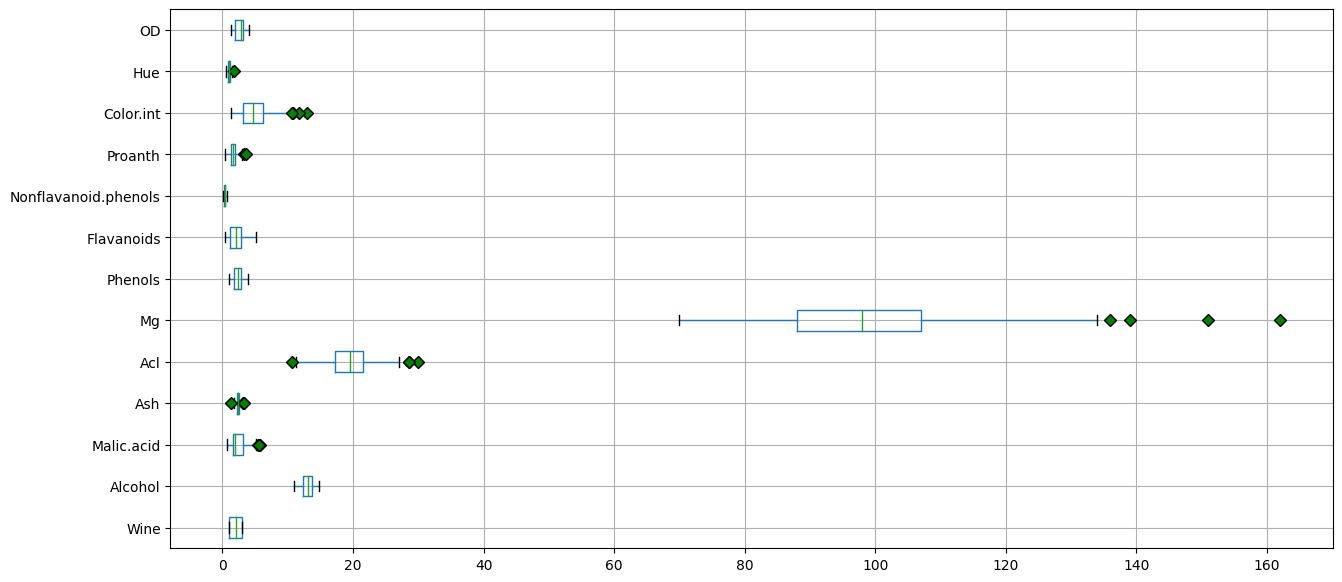

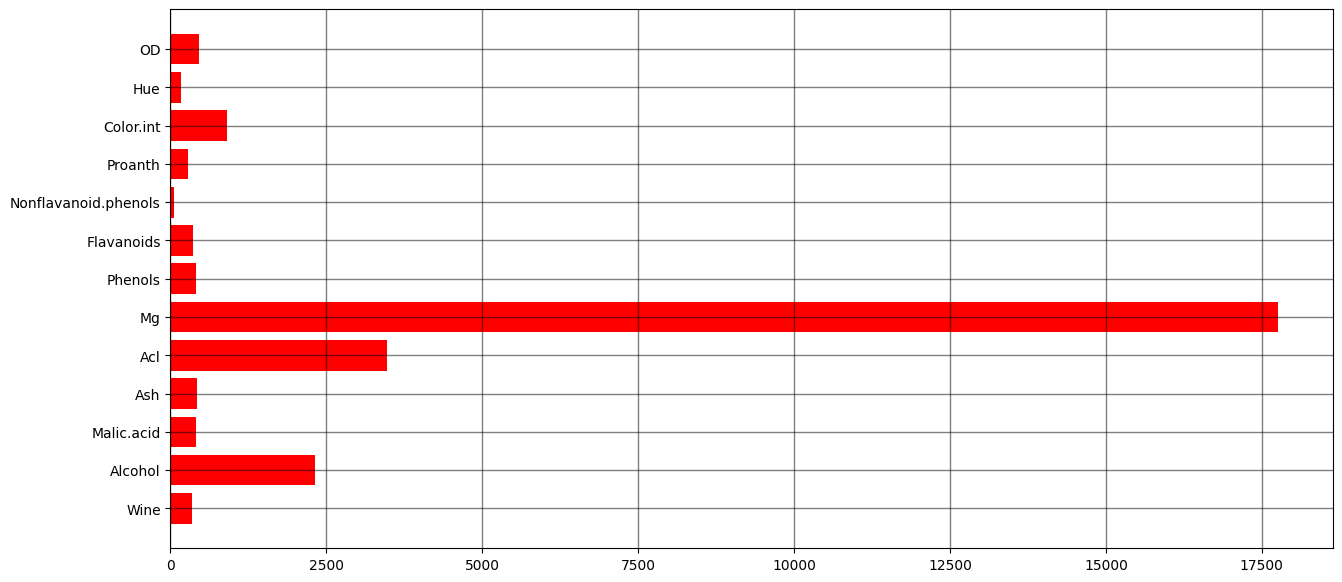

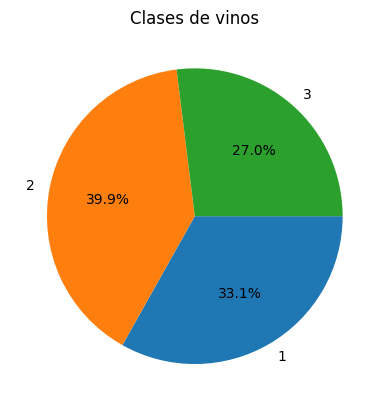

In [ ]:

valoresAtipicos=[]
datasets=[iris_df,diabetes_df,wine_df,titanic_df]
datasets_n=['iris','diabetes','wine','titanic']
print()
#print(f"el dataset {datasets_n[2]} tiene {datasets[2].shape[0]} filas y {datasets[2].shape[1]} columnas ")

print()

#print(wine_df.isnull().sum())

print()

#print(wine_df.dtypes)
print()
#-------------- ver valores unicos con su cantidad - categoricos
"""
valores_unicos_iris=np.unique(iris_df['species'], return_counts=True)
print("la columna \033[92m species \033[0m, contiene datos del tipo categorico, sus valores son:")
for i in range(len(valores_unicos_iris)+1):
  print("  la caracteristica \033[93m",valores_unicos_iris[0][i], "\033[0m tiene una frecuencia absoluta de\033[96m",valores_unicos_iris[1][i],"\033[0m")
"""
#Ok probado
valores=wine_df.describe()
columns = wine_df.columns.values
set_a_usar=wine_df
outliers(valores,columns,set_a_usar)
print()
#-************************************************************************
#box plot
graficar=columns[0:-1].tolist()
# transformo el df en lista
green_diamond = dict(markerfacecolor='g', marker='D')
#tipo de marcador para los datos apartados
plt.figure(figsize=(15,7))
#wine_df.boxplot(column='Malic.acid', flierprops=green_diamond) # para graficar solo una columna
wine_df.boxplot(column=graficar, flierprops=green_diamond,vert=False)
plt.show()
print()
#-************************************************************************
#barras horizontales
plt.figure(figsize=(15,7))
total = wine_df.sum(axis=0)
plt.barh(columns[0:-1],total[0:-1],color = 'red')
plt.grid(color='black', linewidth=1, axis='both', alpha=0.5)
plt.show()
print()
#-************************************************************************
# Datos
fig, ax = plt.subplots()
valores=np.array(np.unique(wine_df['Wine'], return_counts=True))
grupos = valores[0][:]
valor = valores[1][:]
# Pie chart
plt.title('Clases de vinos')
ax.pie(valor, labels = grupos, counterclock = False, autopct = '%1.1f%%')
plt.show()




# Dataset DIABETES


### **Introducción**
---
Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, en función de ciertas medidas de diagnóstico incluidas en el conjunto de datos. Se impusieron varias restricciones a la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres de al menos 21 años de herencia indígena pima.
Los conjuntos de datos consisten en varias variables predictoras médicas y una variable objetivo, Resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, nivel de insulina, edad, etc.
### **Variables**
---
```
print(f"el dataset {datasets_n[0]} tiene {datasets[0].shape[0]} filas y {datasets[0].shape[1]} columnas ")
el dataset diabetes tiene 768 filas y 9 columnas
```
Vemos que el data set posee 768 filas y 9 columnas. Las columnas representan las variables medidas, las cuales son caracteristicas de la poblacion muestreada
```
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
```
Vemos que las variables medidas en el ancho y largo son del tipo cuantitativo continuo.

Valores nulos
---
Vemos que el dataset no posee valores nulos ni faltantes. Esto lo evaluamos con la funcion:
```
iris_df.isnull().sum()
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

```
###Valores atipicos - cualitativos
---
Para encontrar estos valores, hice la funcion OUTLIERS, la cual me da como resultado, si en las columnas numericas, hay valores atipicos.

Como dato de entrada utilizamos la funcion df.describe() cuya salida es:
```
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000                  0.243750   24.000000  
50%     32.000000                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     67.100000                  2.420000   81.000000
```
###Borrar columna
---
En este dataset, borro la columa Outcome. (sin razon en particular, solo que sus valores son muy grandes y no se visualizan bien los valores de las demas columnas)
```
set_a_usar=diabetes_df.drop(['Outcome'], axis=1)  #borro una fila  ()
valores=set_a_usar.describe()                     #uso el df modificado
columns = set_a_usar.columns.values

outliers(valores,columns,set_a_usar)
```



###Analisis de los graficos
---
Se realizan graficos de caja y bigotes y uno de barras, para los datos de las columnas numericas, y se comprueba en ellos que los datos apartados estan en las mismas columnas y con la cantidad correcta.

Se realizan graficos bivariados, para resaltar si hay alguna caracteristica que relacione dos caracteristicas.

* glucosa - insulina
* presion arterial - BMI
* presion arterial - edad
* glucosa - edad

***En estos graficos, la eleccion de las variables surge de un razonamiento sin fundamento medico, solo para ver como se relacionan. Tambien no se borra ninguna columna del dataset, solo la mencionada anteriormente. Por ejemplo la caracteristica insulina tiene muchos valores atipicos y la mayoria son cero, pero no sabemos si del punto de vista medico, tiene relevancia esta columna con relacion a otras, su relacion causa - efecto.***




En la columna  Pregnancies  hay   4  valores atipicos y son: [14, 14, 15, 17] 
En la columna  Glucose  hay   5  valores atipicos y son: [0, 0, 0, 0, 0] 
En la columna  BloodPressure  hay   45  valores atipicos y son: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 30, 30, 108, 108, 110, 110, 110, 114, 122] 
En la columna  SkinThickness  hay   1  valores atipicos y son: [99] 
En la columna  Insulin  hay   34  valores atipicos y son: [321, 325, 325, 325, 326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402, 415, 440, 465, 474, 478, 480, 480, 485, 495, 495, 510, 540, 543, 545, 579, 600, 680, 744, 846] 
En la columna  BMI  hay   19  valores atipicos y son: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 52.3, 52.3, 52.9, 53.2, 55.0, 57.3, 59.4, 67.1] 
En la columna  DiabetesPedigreeFunction  hay   29  valores atipicos y son: [1.213, 1.222, 1.224, 1.224, 1.251, 1.258, 1.268, 1.282, 1.292, 1.318, 1.321, 1.353, 1.39, 1.391

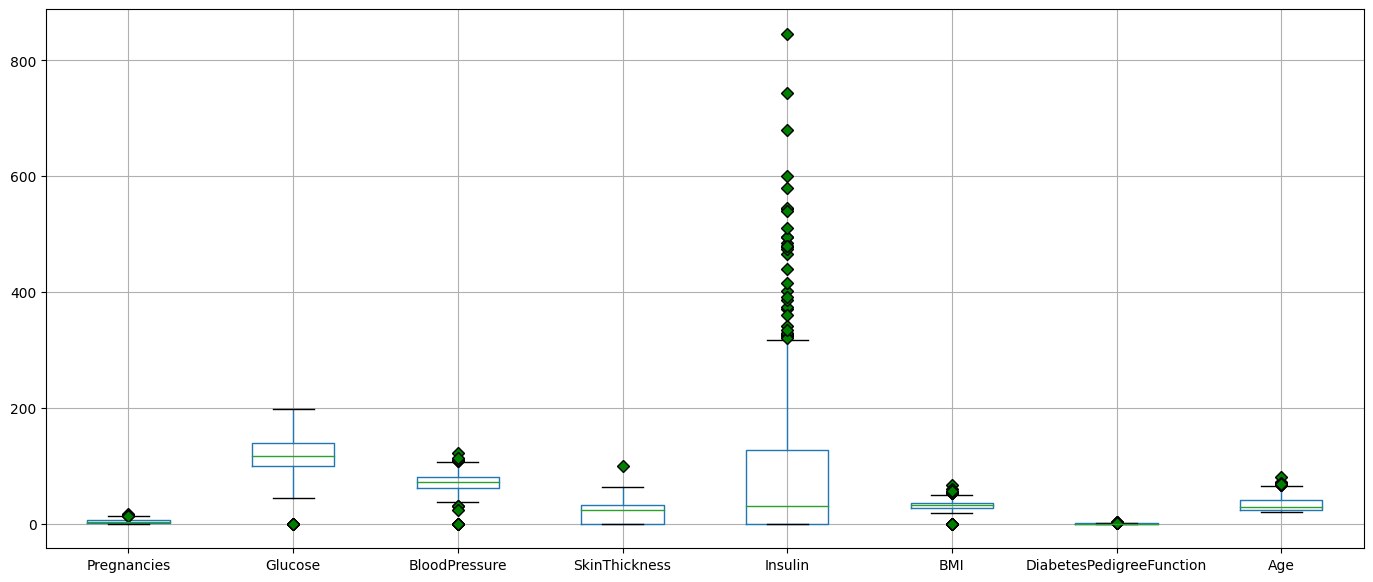

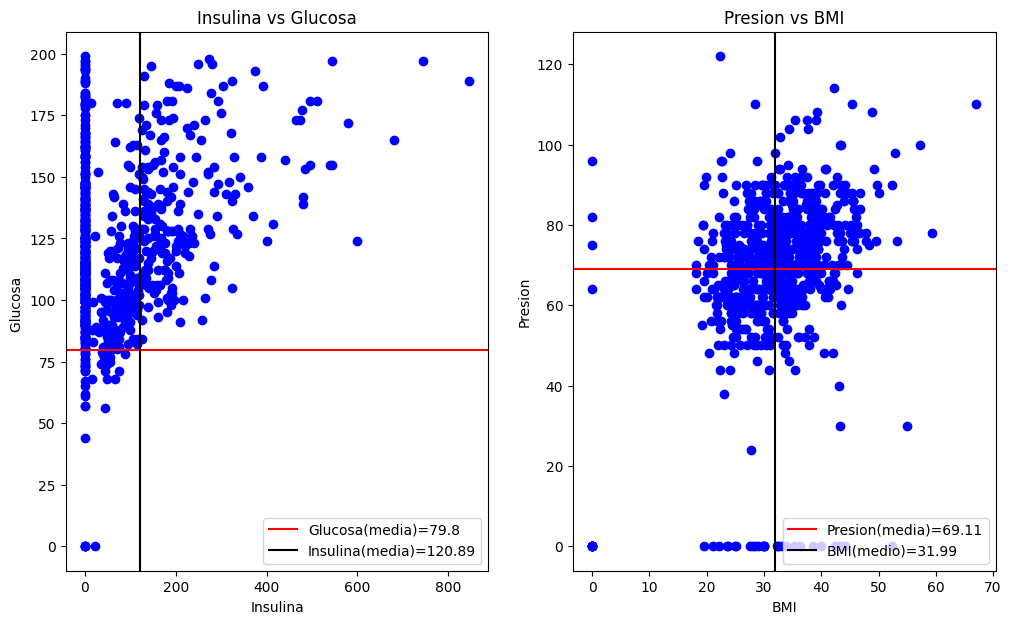

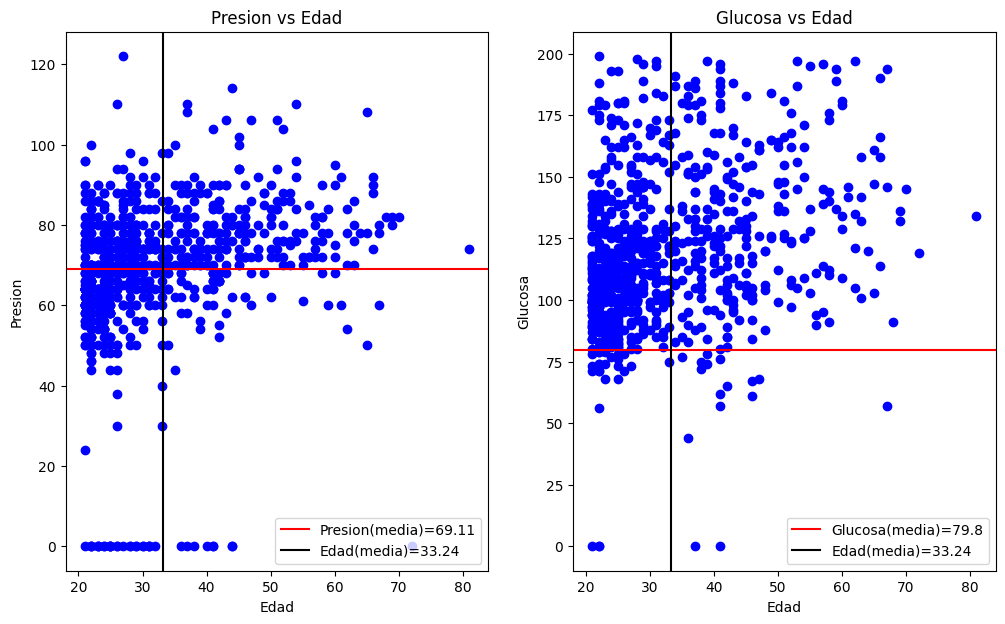

In [ ]:
#esto explicarlo en palabras
# Explicar de cada data set , sus diferentes Variables
#Decide justificando tu respuesta que tipo de categoria de variable son
diabetes_df= pd.read_csv('https://raw.githubusercontent.com/luisbisaro/pandas.datasets/main/diabetes.csv')


valoresAtipicos=[]
datasets=[iris_df,diabetes_df,wine_df,titanic_df]
datasets_n=['iris','diabetes','wine','titanic']

""" #
print()
print(f"el dataset {datasets_n[1]} tiene {datasets[1].shape[0]} filas y {datasets[1].shape[1]} columnas ")

print(diabetes_df.isnull().sum())
print()
print(diabetes_df.dtypes)
print()

valores=diabetes_df.describe()
columns = diabetes_df.columns.values
set_a_usar=diabetes_df
print(valores)
print()
"""
set_a_usar=diabetes_df.drop(['Outcome'], axis=1)  #borro una fila  ()
valores=set_a_usar.describe()                     #uso el df modificado
columns = set_a_usar.columns.values

outliers(valores,columns,set_a_usar)

print()

#-************************************************************************
graficar=columns[0:].tolist()
# transformo el df en lista
green_diamond = dict(markerfacecolor='g', marker='D')
#tipo de marcador para los datos apartados
plt.figure(figsize=(17,7))
#diabetes_df.boxplot(column='SkinThickness', flierprops=green_diamond) # para graficar solo una columna
diabetes_df.boxplot(column=graficar, flierprops=green_diamond)
plt.show()
print()
#-************************************************************************

#-*************************************************************************
#glucose - insuline  OK
print()
plt.figure(figsize=(12, 7))
plt.subplot(1,2,1)
plt.plot(diabetes_df['Insulin'],diabetes_df['Glucose'] , 'o', color='blue')  #x,y
plt.xlabel('Insulina')
plt.ylabel('Glucosa ')
plt.title('Insulina vs Glucosa')
plt.axhline(y=round(valores.iat[1,4],2), color="red", label=('Glucosa(media)='+str(round(valores.iat[1,4],2))+''))
plt.axvline(x=round(valores.iat[1,1],2), color="black", label=('Insulina(media)='+str(round(valores.iat[1,1],2))+''))
plt.legend(loc = 'lower right')

#-*************************************************************************
#blood pressure - BMI OK
plt.subplot(1,2,2)
plt.plot(diabetes_df['BMI'],diabetes_df['BloodPressure'] , 'o', color='blue')
plt.xlabel('BMI')
plt.ylabel('Presion')
plt.title('Presion vs BMI')
plt.axhline(y=round(valores.iat[1,2],2), color="red", label=('Presion(media)='+str(round(valores.iat[1,2],2))+''))
plt.axvline(x=round(valores.iat[1,5],2), color="black", label=('BMI(medio)='+str(round(valores.iat[1,5],2))+''))
plt.legend(loc = 'lower right')
plt.show()
print()
#-************************************************************************

#-*************************************************************************
#age  - blood pressure OK
plt.figure(figsize=(12, 7))
plt.subplot(1,2,1)
plt.plot(diabetes_df['Age'],diabetes_df['BloodPressure'] , 'o', color='blue')
plt.ylabel('Presion')
plt.xlabel('Edad')
plt.title('Presion vs Edad')
plt.axhline(y=round(valores.iat[1,2],2), color="red", label=('Presion(media)='+str(round(valores.iat[1,2],2))+''))
plt.axvline(x=round(valores.iat[1,7],2), color="black", label=('Edad(media)='+str(round(valores.iat[1,7],2))+''))
plt.legend(loc = 'lower right')

#-*************************************************************************
#glucose - age
plt.subplot(1,2,2)
plt.plot(diabetes_df['Age'], diabetes_df['Glucose'], 'o', color='blue')
plt.ylabel('Glucosa')
plt.xlabel('Edad')
plt.title('Glucosa vs Edad')
plt.axhline(y=round(valores.iat[1,4],2), color="red", label=('Glucosa(media)='+str(round(valores.iat[1,4],2))+''))
plt.axvline(x=round(valores.iat[1,7],2), color="black", label=('Edad(media)='+str(round(valores.iat[1,7],2))+''))
plt.legend(loc = 'lower right')
plt.show()
print()
#-************************************************************************


# Dataset TITANIC ⛴ ⚠


### **Introducción**
---
Este conjunto de datos, contiene una lista de pasajeros, a los cuales no se les a clasificado su supervivencia. Esta lista, la utilizaremos al final para determinar la supervivencia de dichos pasajeros según sus ciertas características (Sexo, edad, cabina, embarcación, entre otras).

|Variable |Definition |Key|
|-|-|-|
| survival| 	Sobreviviente| 	0 = No, 1 = Yes|
| pclass	| Clase	| 1 = 1st, 2 = 2nd, 3 = 3rd|
| sex	| Sexo	| male - female|
| Age	| Edad|  en años	|
| sibsp	| # herman@s / cónyuges abordo	| |
| parch	| # de padres / hij@s abordo	| |
| ticket| 	N° de Ticket	| |
| fare	| Tarifa de pasajero	| |
| cabin	| N° de Cabina	| |
| embarked |Puerto de Embarcación	C = Cherbourg, Q = Queenstown, S = Southampton| |

### **Variables**
---
```
print(f"el dataset {datasets_n[0]} tiene {datasets[0].shape[0]} filas y {datasets[0].shape[1]} columnas ")
el dataset titanic tiene 891 filas y 12 columnas
```
Vemos que el data set posee 891 filas y 12 columnas. Las columnas representan las variables , las cuales son datos de la poblacion.
```
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
```
Vemos que las variables son del tipo cuantitativo continuo.

Valores nulos
---
Vemos que el dataset posee valores nulos y faltantes. Esto lo evaluamos con la funcion:
```
print(titanic_df.info())
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
```
Para la columna edad, lo que se realiza es rellenar los valores nulos con la media de la columna, esto es para no modificar mucho el valor medio de la columna total. Tambien se podria borrar las filas en donde se encuentran los valores faltantes, pero dada la cantidad que hay respecto del total, se prefiere rellenar.
Para la columna Puerto de embarque, se procede a rellenar los faltantes con "N", para representar que no hay valor asignado.
```
titanic_df.Embarked.fillna('N',inplace=True) #reemplazo los valores NaN con N
edad_media = round(np.mean(titanic_df['Age'], axis=0),2)
titanic_df.Age.fillna(edad_media,inplace=True)
```
```
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
```

###Valores atipicos - cualitativos
---
Para encontrar estos valores, hice la funcion OUTLIERS, la cual me da como resultado, si en las columnas numericas, hay valores atipicos.
En este caso la funcion que se diseño para los outliers, solo funciona con algun numero de columnas, no con el dataset completo (se aplica solo para edad).

Como dato de entrada utilizamos la funcion df.describe() cuya salida es:
```
       PassengerId    Survived      Pclass         Age       SibSp  
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200
```
###Borrar columna
---
En este dataset, hay varias columnas que se pueden borrar, tal como las que toman los datos de los padres o hermanos de cada pasajero, o la de tarifa.



###Analisis de los graficos
---
Se realizan graficos de caja y bigotes y uno de barras, para los datos de las columnas numericas, y se comprueba en ellos que los datos apartados estan en las mismas columnas y con la cantidad correcta.












In [ ]:
#PassengerId	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked

titanic_df_cuanti= pd.read_csv('https://raw.githubusercontent.com/luisbisaro/pandas.datasets/main/titanic.csv',usecols=['Age'])

titanic_df= pd.read_csv('https://raw.githubusercontent.com/luisbisaro/pandas.datasets/main/titanic.csv')

#print(f"el dataset {datasets_n[3]} tiene {datasets[3].shape[0]} filas y {datasets[3].shape[1]} columnas ")
#print(titanic_df.describe())
#print(titanic_df.isnull().sum())
#print(titanic_df.info())

#--------------------- reemplazo los valores NaN ----------------------------------------------------------------------
#
titanic_df.Embarked.fillna('N',inplace=True) #reemplazo los valores NaN con n
edad_media = round(np.mean(titanic_df['Age'], axis=0),2)
titanic_df.Age.fillna(edad_media,inplace=True) #reemplazo los valores NaN con la edad media
#print(titanic_df.isnull().sum())# verifico que se hayan realizado los cambios en las columnas age y embarked
#----------------------------------------------------------------------------------------------------------------------

valores=titanic_df_cuanti.describe()
columns = titanic_df_cuanti.columns.values
set_a_usar=titanic_df_cuanti
outliers(valores,columns,set_a_usar)


#----------------------------------------------------------------------------------------------------------------------
print()
#-************************************************************************
# Datos
fig, ax = plt.subplots()
valores=np.array(np.unique(titanic_df['Embarked'], return_counts=True))
grupos = valores[0][:]
valor = valores[1][:]
# Pie chart
plt.title('Puerto de Embarque')
ax.pie(valor, labels = grupos, counterclock = False, autopct = '%1.1f%%')
plt.show()
print()
#-************************************************************************
# Datos
fig, ax = plt.subplots()
valores=np.array(np.unique(titanic_df['Pclass'], return_counts=True))
grupos = valores[0][:]
valor = valores[1][:]
# Pie chart
plt.title('Distribucion de Clases')
ax.pie(valor, labels = grupos, counterclock = False, autopct = '%1.1f%%')
plt.show()
#-************************************************************************

sns.barplot(x="Embarked", y="Survived", hue="Sex", data=titanic_df)



NameError: ignored

# comentarios

In [ ]:
## error en la funcion outliers cuando envio varias columnas mezcladas de datos categoricos y datos numericos
## ejemplo en titanic_df idpasajero, sexo, embarcado, edad
"""
   def __getitem__(self, key):

        Override numpy.ndarray's __getitem__ method to work as desired.

        This function adds lists and Series as valid boolean indexers
        (ndarrays only supports ndarray with dtype=bool).

        If resulting ndim != 1, plain ndarray is returned instead of
        corresponding `Index` subclass.


        getitem = self._data.__getitem__

        if is_integer(key) or is_float(key):
            # GH#44051 exclude bool, which would return a 2d ndarray
            key = com.cast_scalar_indexer(key, warn_float=True)
            return getitem(key)
"""

#####################################funciones utiles-----------------------------------

#mostrar la primeras filas
#print(iris_df.head(5))

#df.shape # retorna un Tuple asi: (filas, col)
#print(iris_df.describe) # descripcion
#iris_df.isnull() #ver si hay datos nulos
#df.dtypes  #Tipos de datos que existen en las columnas del dataframe

#iris_df.info()    #informacion de las variables

#iris_df.isnull().sum() #verifico si las columas tienen elementos nulos

#iris_df.hist()
#pandas.DataFrame.replace

#print(titanic_df['Age']) #se puede llamar a una columna con el nombre de la misma
#diabetes_df ['Glucose']. max ()

#-----------------------------------------------------------------------------------------------------
#------------------------ GRAFICA DE CADA COLUMNA box plot   -----------------------------------------
#-----------------------------------------------------------------------------------------------------
#graficar=columns[0:-1].tolist()
# transformo el df en lista

#green_diamond = dict(markerfacecolor='g', marker='D')
#tipo de marcador para los datos apartados
#plt.figure(figsize=(20,15))
#diabetes_df.boxplot(column=graficar, flierprops=green_diamond)
#iris_df.boxplot(column='sepal_width', flierprops=green_diamond) # para graficar solo una columna
#iris_df.boxplot(column=graficar, flierprops=green_diamond)
#grafico todas las columnas juntas, en las columas uso la lista que genere anteriormente

#-----------------------------------------------------------------------------------------------------


print()



# prueba Chernoff

https://pypi.org/project/ChernoffFace/

https://mathematicaforprediction.wordpress.com/2016/06/03/making-chernoff-faces-for-data-visualization/
https://datascience.oneoffcoder.com/chernoff-deeplearning.html

https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb#scrollTo=kDn_lVxg3Z2G



In [ ]:
!pip install git+https://github.com/antononcube/Python-packages.git#egg=ChernoffFace\&subdirectory=ChernoffFace

  Cloning https://github.com/antononcube/Python-packages.git to /tmp/pip-install-ti0wsg0g/chernoffface_5feef5bf0ff446438bb89ba67c461123
  Running command git clone --filter=blob:none --quiet https://github.com/antononcube/Python-packages.git /tmp/pip-install-ti0wsg0g/chernoffface_5feef5bf0ff446438bb89ba67c461123
  Resolved https://github.com/antononcube/Python-packages.git to commit 2ed509a4f8a0ff98acf62a3bc4de7fbbf2cfb5d2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done




```
def chernoff_face(data, n_rows: Optional[int]=None, n_columns: Optional[int]=None, make_symmetric: bool=True, color_mapper: Optional[matplotlib.colors.LinearSegmentedColormap]=None, long_face: bool=False, titles=None, figure: Optional[matplotlib.figure.Figure]=None, location=None, **kwargs)
Makes Chernoff face diagrams.

:type data: Any
:param data: Data to be plotted.

:type n_rows: int|None
:param n_rows: Number of rows.

:type n_columns: int|None
:param n_columns: Number of columns.

:type make_symmetric: bool
:param make_symmetric: The faces can be made symmetric for shorter faces.

:type color_mapper: matplotlib.colors.LinearSegmentedColormap|None
:param color_mapper: Color mapping object.

:type long_face: bool
:param long_face: Should the face be longer of wider.

:type titles: list|tuple
:param titles: Titles for the each of the face in face collection.

:type figure: matplotlib.figure.Figure|None
:param figure: Figure to draw the Chernoff faces diagrams into.

:type location: tuple|None
:param location: Location spec to add the Chernoff face to.

:type kwargs: **dict
:param kwargs: Arguments for matplotlib.pyplot.figure .

:rtype resFig: matplotlib.figure.Figure
:return resFig: A figure (object of the class matplotlib.figure.Figure .)
```


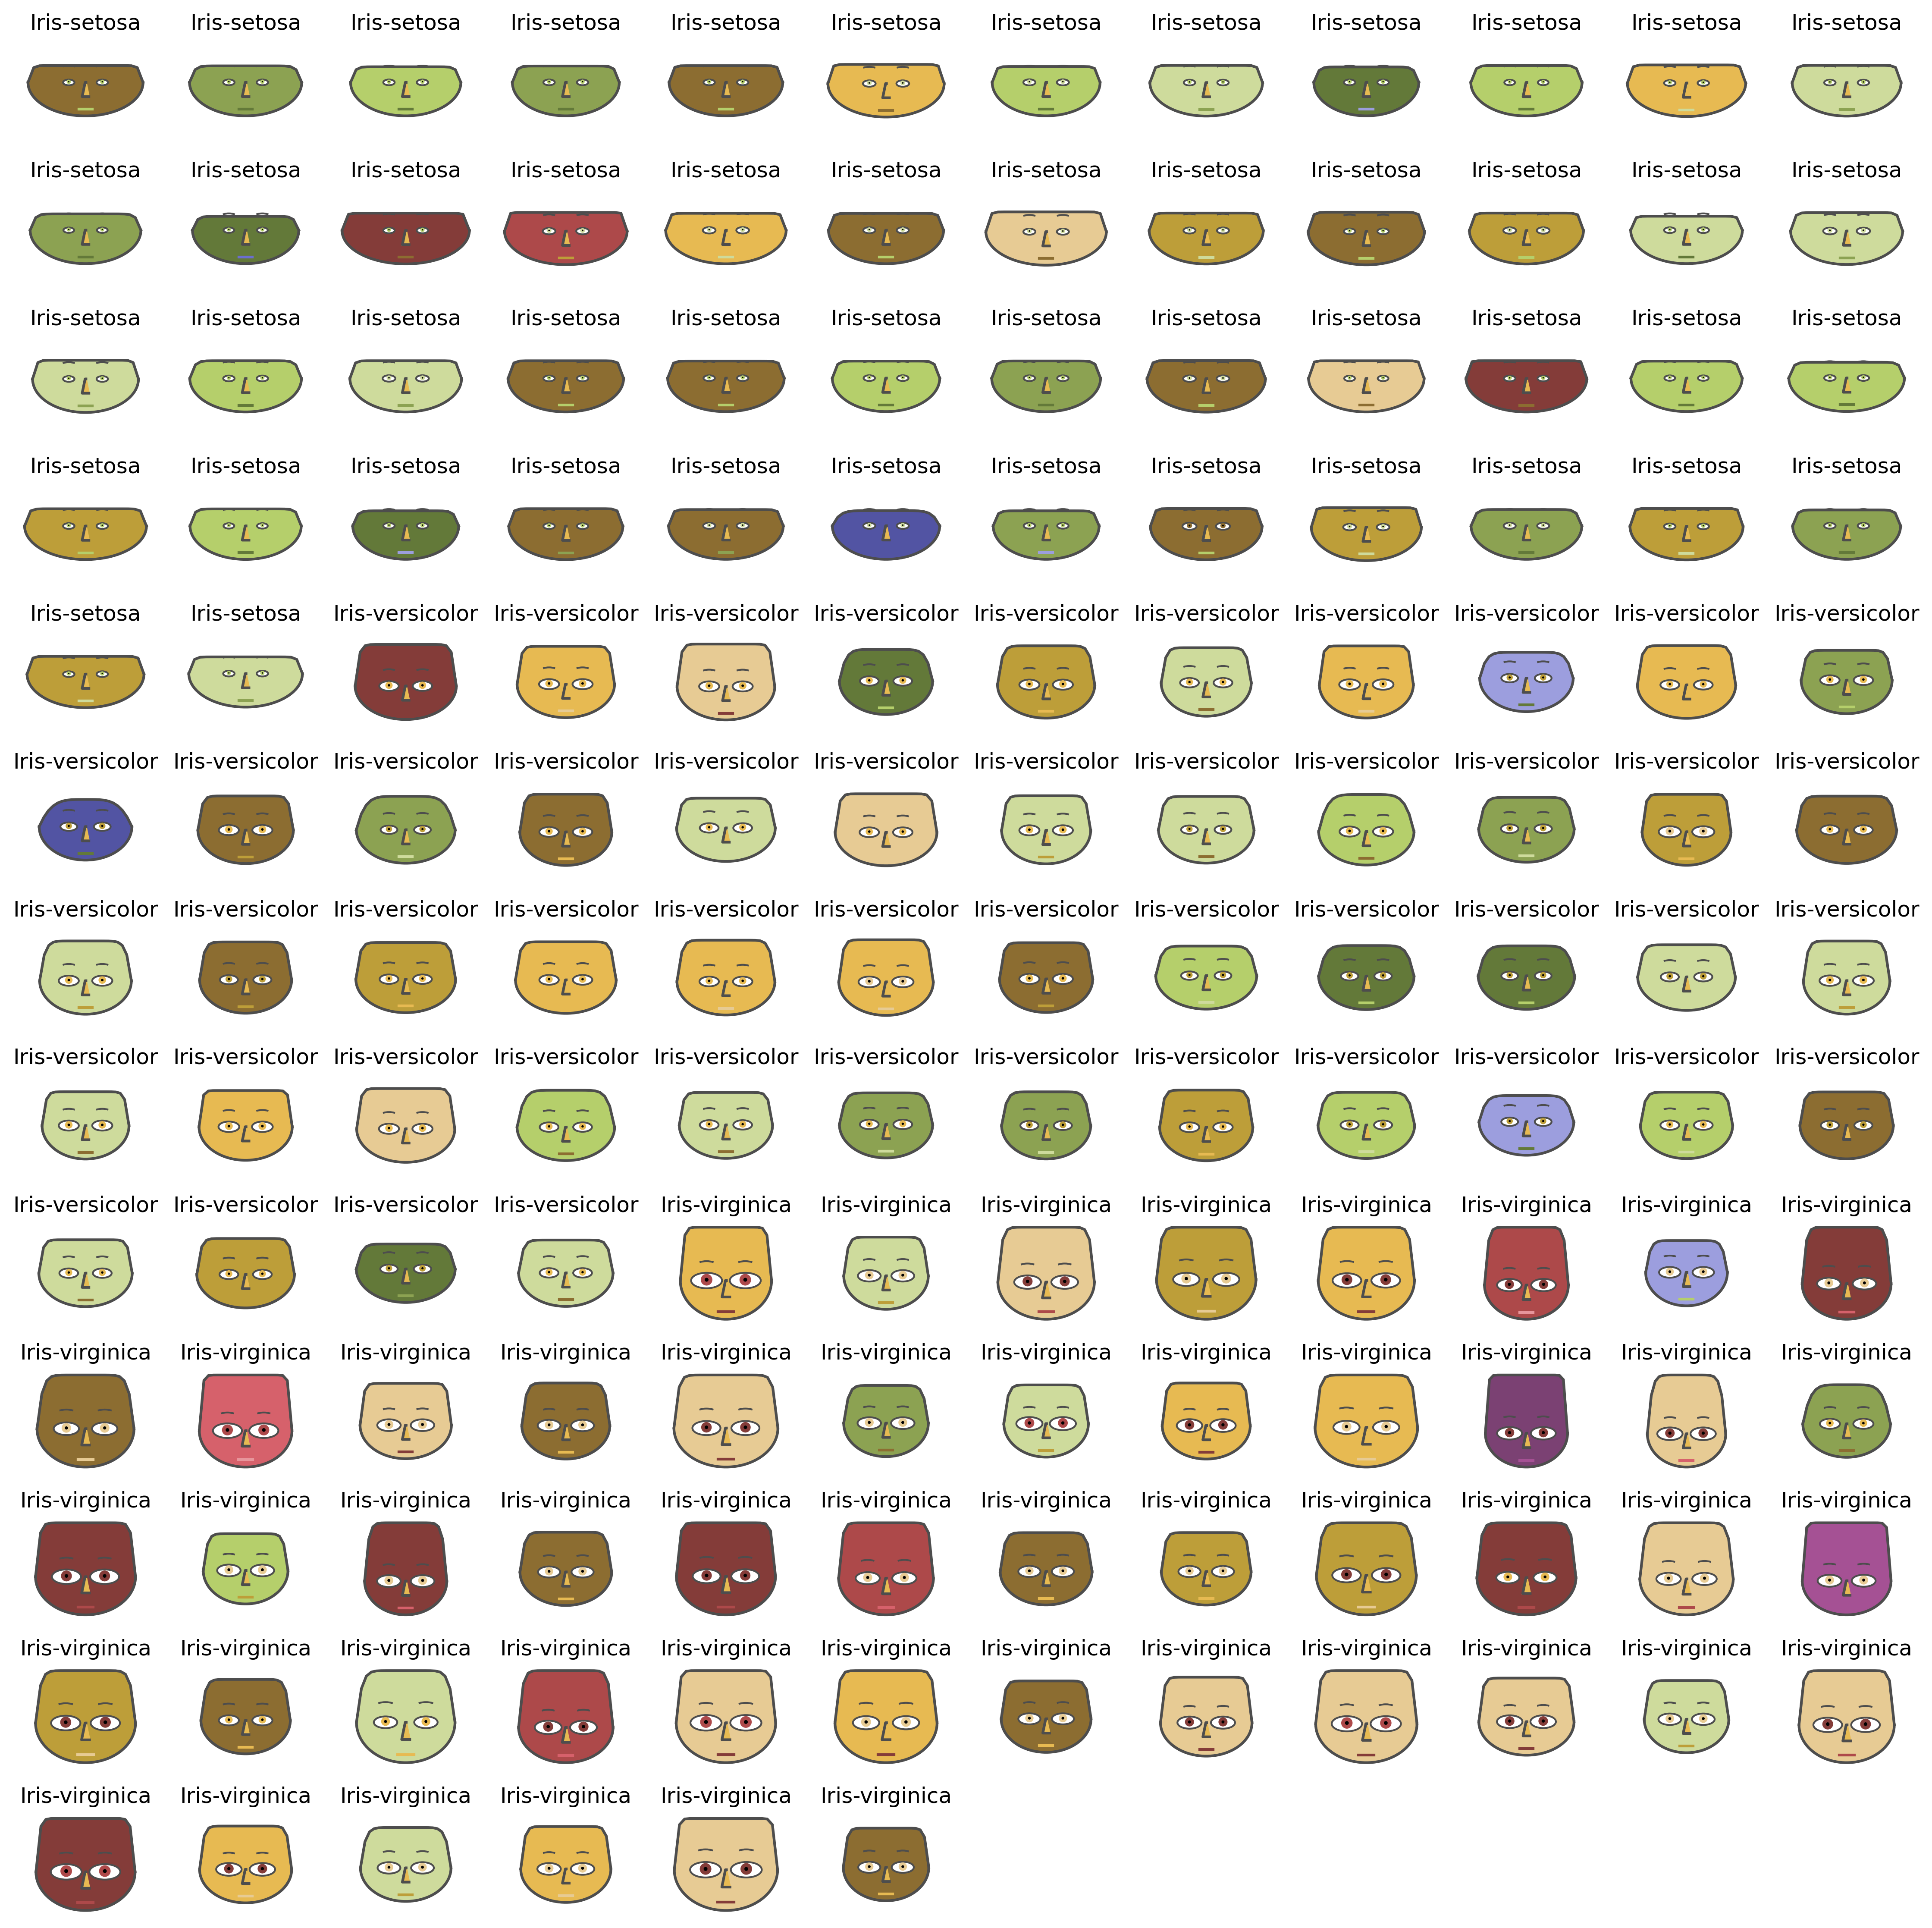

In [ ]:
import ChernoffFace
import numpy as np
import matplotlib.cm
import matplotlib

dfData2 = variables_rescale(iris_df)
fig = chernoff_face(data=dfData2,long_face=False,color_mapper=matplotlib.cm.tab20b,figsize=(15, 15),dpi=300)
fig.tight_layout()
plt.show()

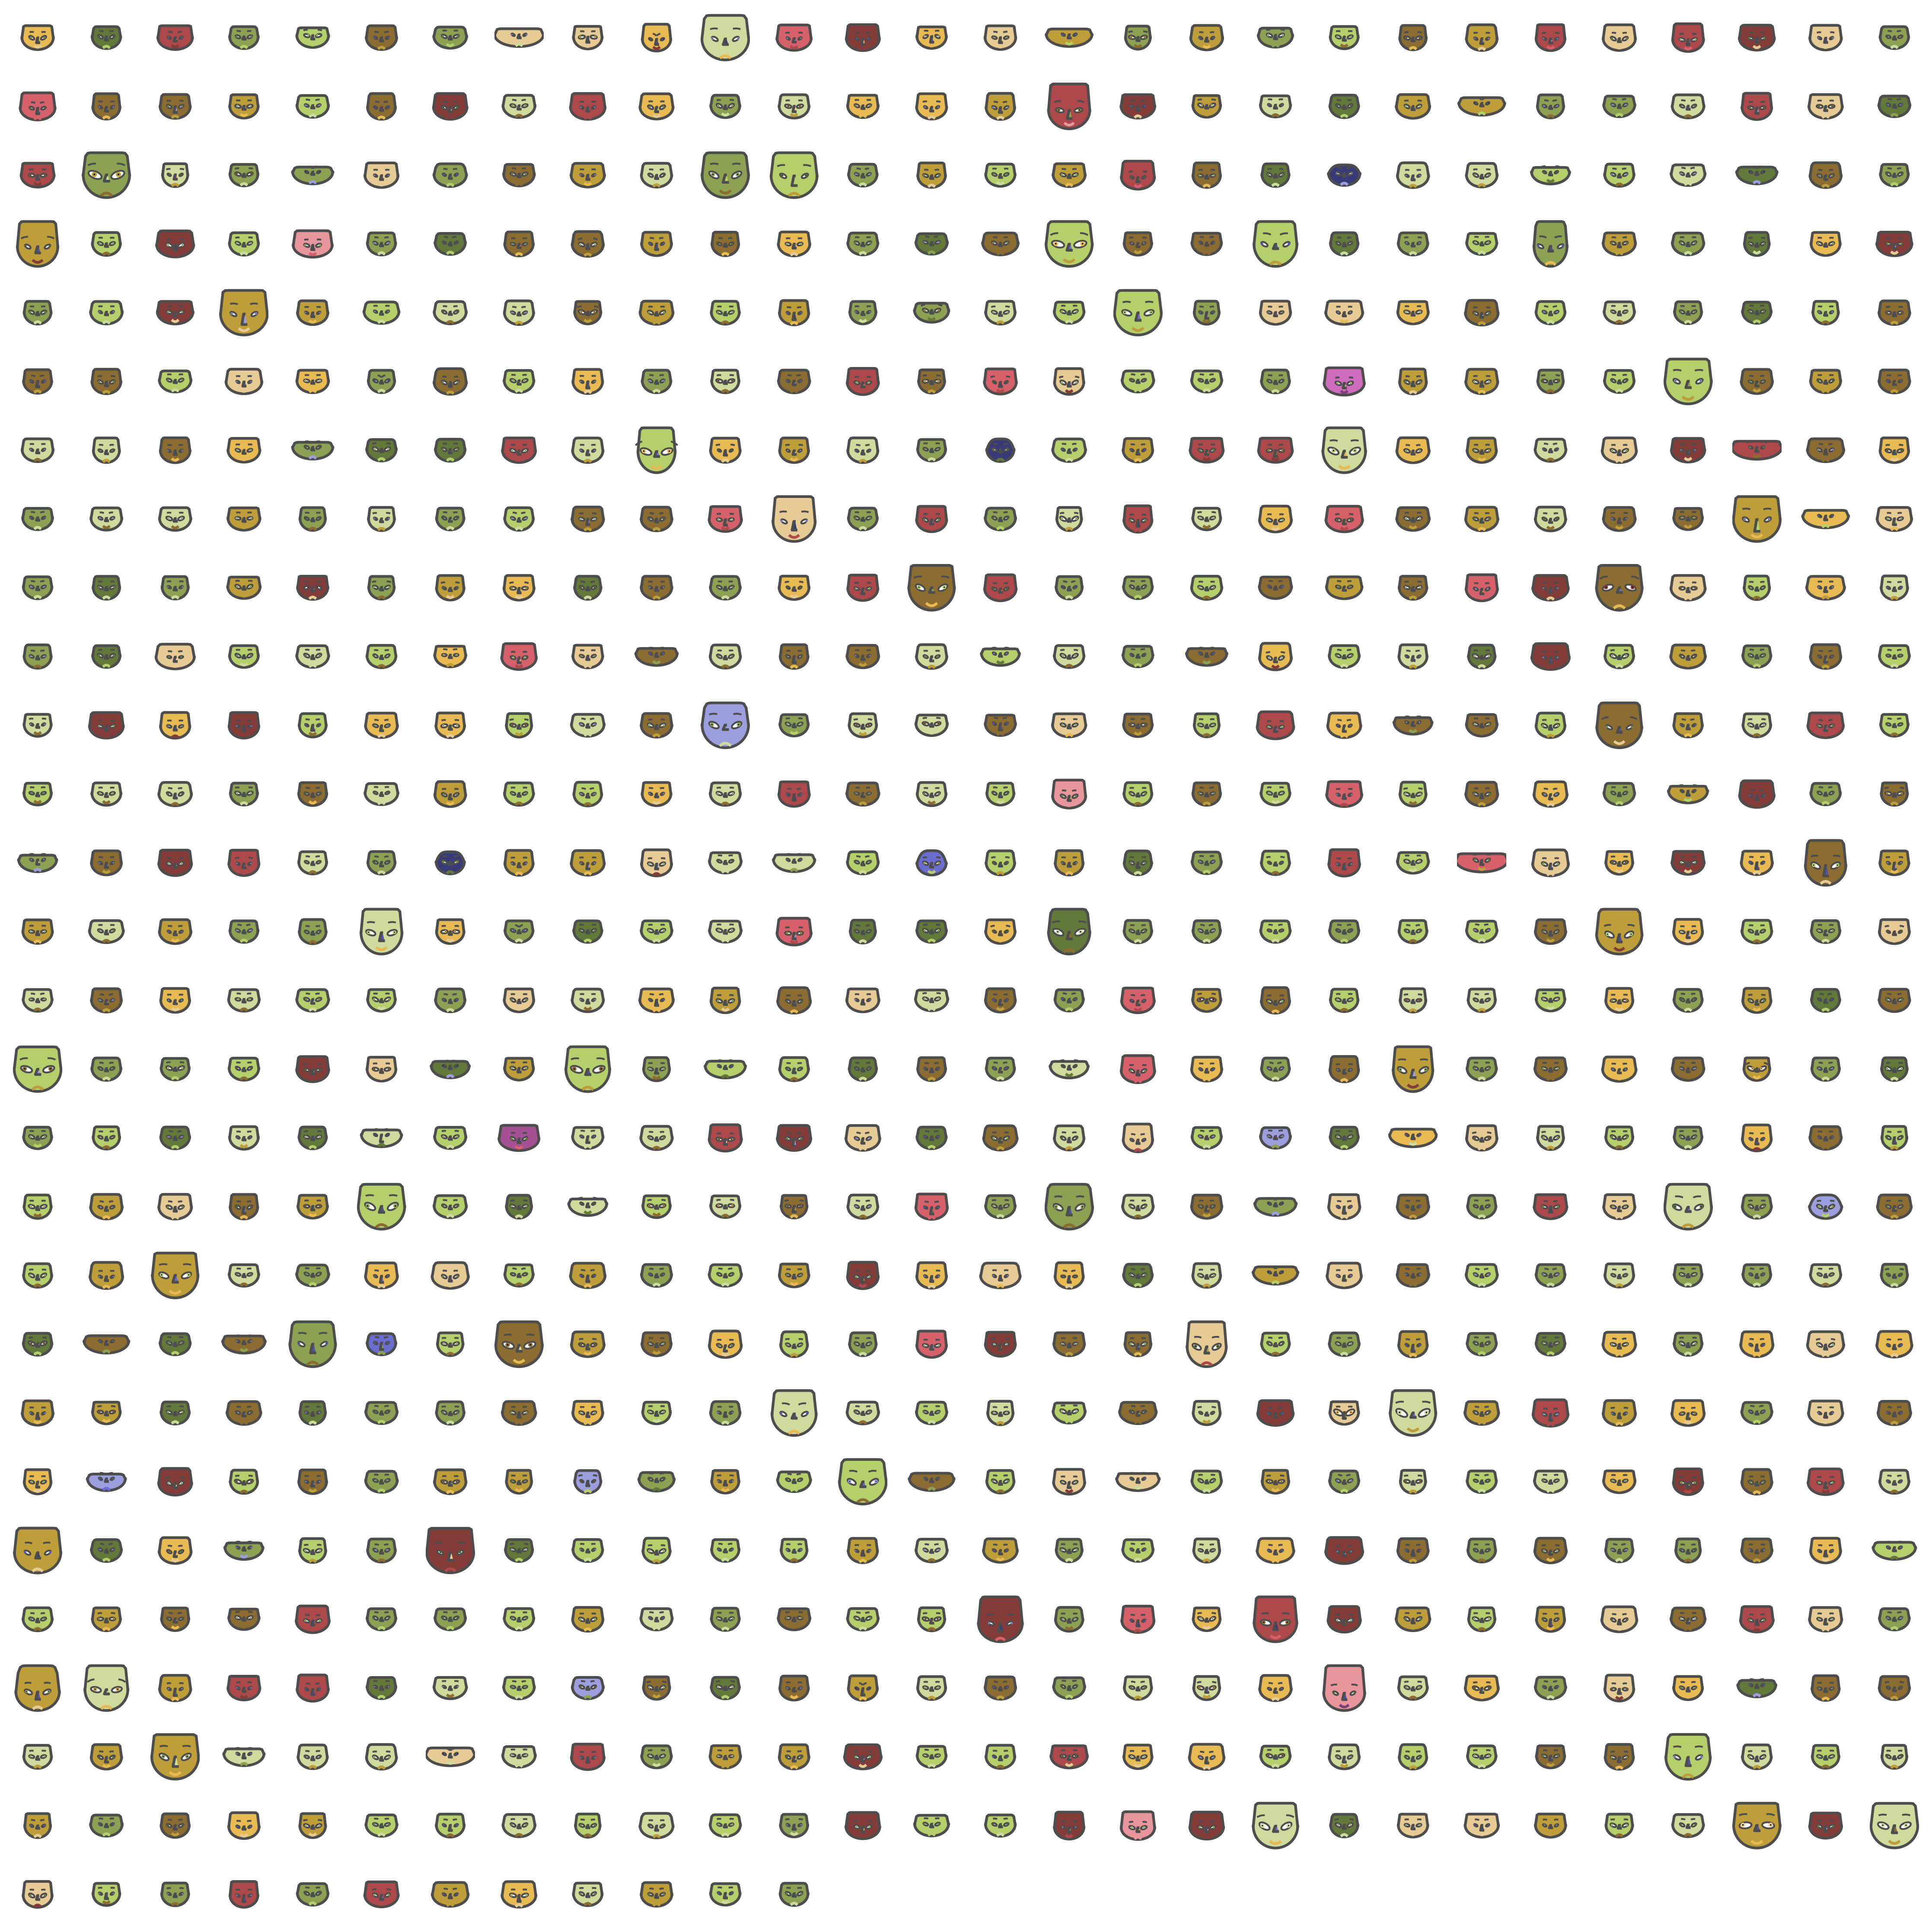

In [ ]:
import ChernoffFace
import numpy as np
import matplotlib.cm
import matplotlib

dfData2 = variables_rescale(diabetes_df)
fig = chernoff_face(data=dfData2,long_face=False,color_mapper=matplotlib.cm.tab20b,figsize=(15, 15),dpi=300)
fig.tight_layout()
plt.show()

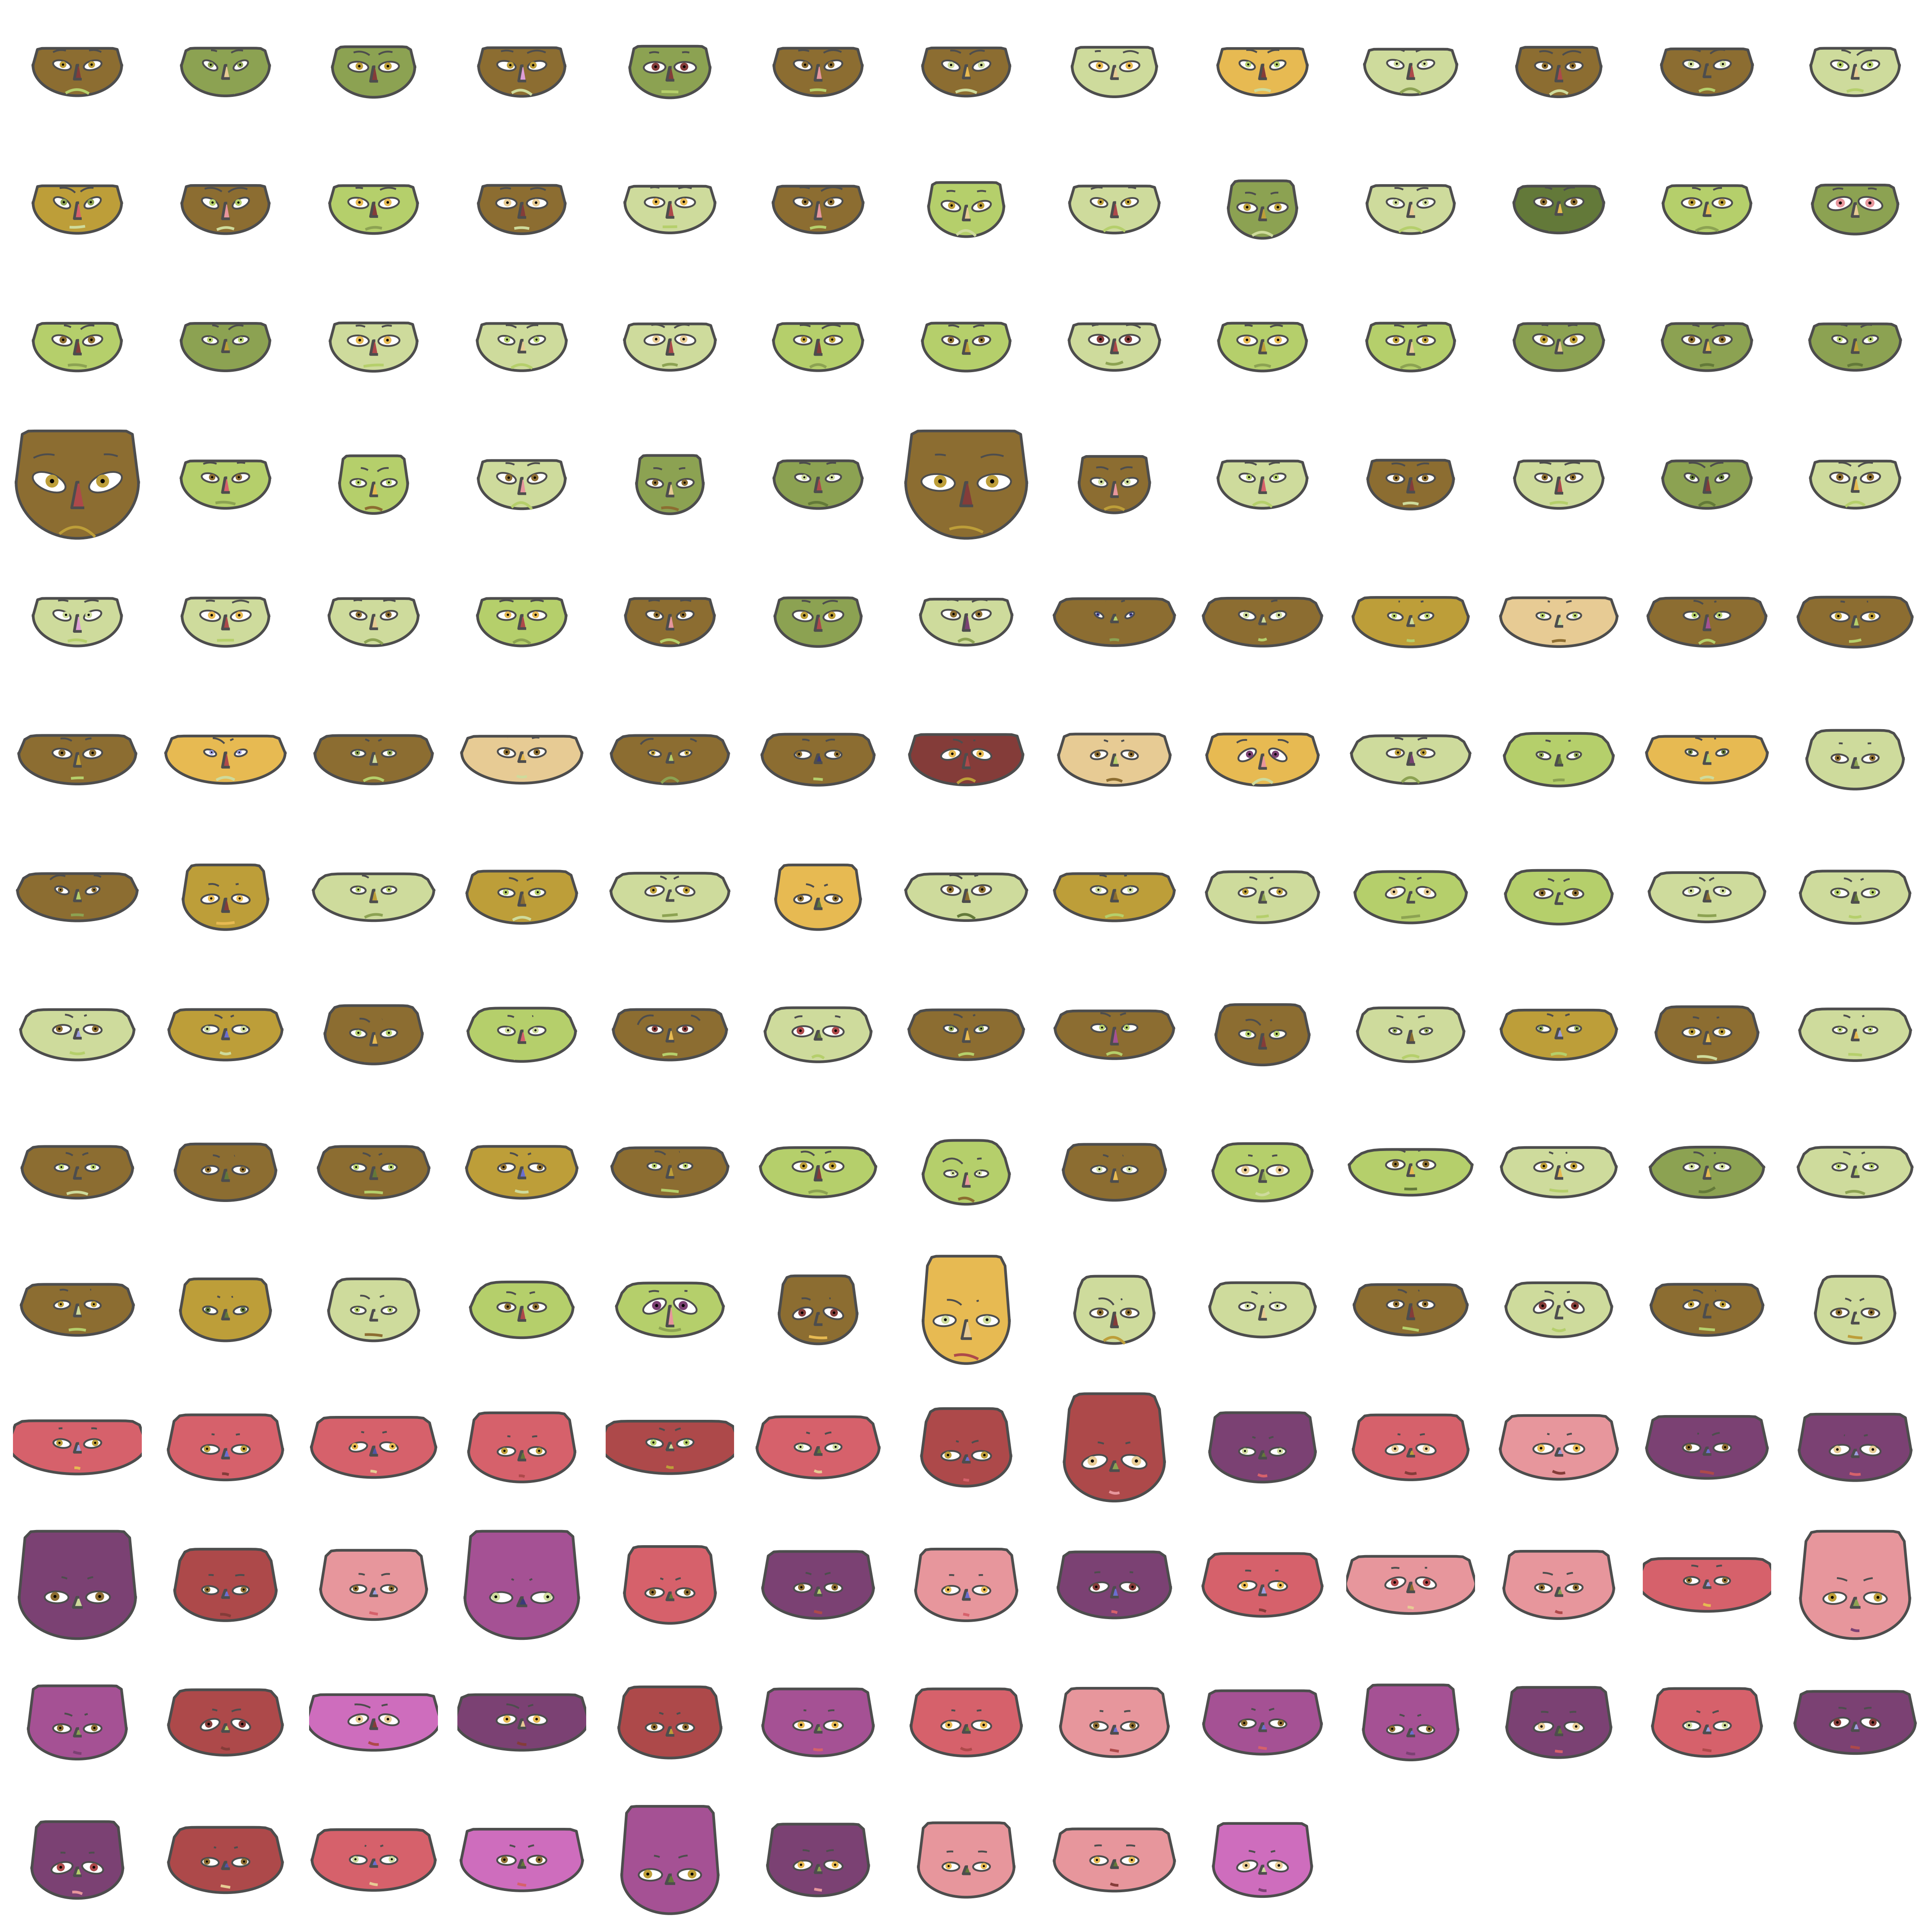

In [ ]:
import ChernoffFace
import numpy as np
import matplotlib.cm
import matplotlib

dfData2 = variables_rescale(wine_df)
fig = chernoff_face(data=dfData2,long_face=False,color_mapper=matplotlib.cm.tab20b,figsize=(15, 15),dpi=300)
fig.tight_layout()
plt.show()